<a href="https://www.kaggle.com/code/rahelederakhshande/flights-data-analysis?scriptVersionId=213595478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **<div style = "text-align:center"><span style = "color:#8502d1"><b>Flights Data Analysis</b></span></div>**

<a id="import"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<a id="read"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>


In [2]:
# Read dataset
df = pd.read_csv('/kaggle/input/flights/flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __id__ | A unique identifier assigned to each flight record in this dataset. |                
| __year__ | The year in which the flight took place. The dataset includes flights from the year 2013 |                        
| __month__ | The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December) |
| __day__ | The day of the month on which the flight took place, represented by an integer from 1 to 31 |
| __dep_time__ | The actual departure time of the flight, represented in 24-hour format (hhmm) |                     
| __sched_dep_time__ | The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm) |
| __dep_delay__ | The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. Positive values indicate a delay, while negative values indicate an early departure. |  
| __arr_time__ | The actual arrival time of the flight, represented in 24-hour format (hhmm) |                      
| __sched_arr_time__ | The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm) |
| __arr_delay__ |  The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. Positive values indicate a delay, while negative values indicate an early arrival |
| __carrier__ |  A two-letter code representing the airline carrier responsible for the flight |                      
| __flight__ | The designated number of the flight |              
| __tailnum__ | A unique identifier associated with the aircraft used for the flight |                      
| __origin__ | A three-letter code signifying the airport from which the flight departed |
| __dest__ | A three-letter code representing the airport at which the flight arrived |
| __air_time__ | The duration of the flight, measured in minutes |                 
| __distance__ | The total distance (in miles) between the origin and destination airports | 
| __hour__ | The hour component of the scheduled departure time, expressed in local time | 
| __minute__ | The minute component of the scheduled departure time, expressed in local time | 
| __time_hour__ | The scheduled departure time of the flight, represented in local time and formatted as "yyyy-mm-dd hh:mm:ss" | 
| __name__ | The full name of the airline carrier responsible for the flight | 

<a id="overview"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>



In [3]:
# Display a concise summary "of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [4]:
df.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inferences:</font></h2>

* The dataset contains __336,776 entries__ (rows) and __21 columns__.
    
    
* The columns are of different data types: 
    - integer (int64)
    - float (float64)
    - object (usually representing string or categorical data).
    
    
* The dataset contains some __missing values__. Specifically, the columns `dep_time`, `dep_delay`, `arr_time`, `arr_delay`, `tailnum`, and `air_time` have a certain number of non-null entries, indicating that there are some missing values in these columns.

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

Based on the data types and the feature explanations we had earlier, we can see that the `id` and `flight` features are indeed numerical in terms of data type, but categorical in terms of their semantics. These two features should be converted to string (__object__) data type for proper analysis and interpretation:

In [5]:
# Convert 'id' and 'flight' to object data type
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

## <div style = "text-align:left ; font-size:80%"><span style = "color:#8502d1"><b>Statistics for Numerical Variables</b></span></div>

In [6]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0


<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inferences:</font></h2>
    
    
* __`year`__: All records are from the year 2013, hence there is no variation.
* __`month`__, __`day`__, __`hour`__, __`minute`__: These features show the scheduled departure date and time. They have a good range and seem to be evenly distributed throughout the year and day.
* __`dep_time`__, __`sched_dep_time`__, __`arr_time`__, __`sched_arr_time`__: These are the actual and scheduled departure and arrival times of the flights. They are in the 24-hour format and cover all possible values.
* __`dep_delay`__, __`arr_delay`__: These are our target variables. They show the departure and arrival delays in minutes. The values range from negative (early departure or arrival) to positive (late departure or arrival).
* __`air_time`__: This is the flight duration in minutes. It varies from 20 to 695 minutes.
* __`distance`__: This is the total distance between the origin and destination airports. It varies from 17 to 4983 miles.  

<a id="eda"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>



## <div style = "text-align:left ; font-size:80%"><span style = "color:#8502d1"><b>1)Univariate Analysis</b></span></div>

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">
    
We can perform univariate analysis on these columns based on their datatype:

* For __numerical__ data, we can use a __histogram__ to visualize the data distribution. The number of bins should be chosen appropriately to represent the data well.
* For __categorical__ data, we can use a __bar plot__ to visualize the frequency of each category.

In [7]:
# Set color for the plots
color = '#8502d1'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()
    
# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> year</span></b>

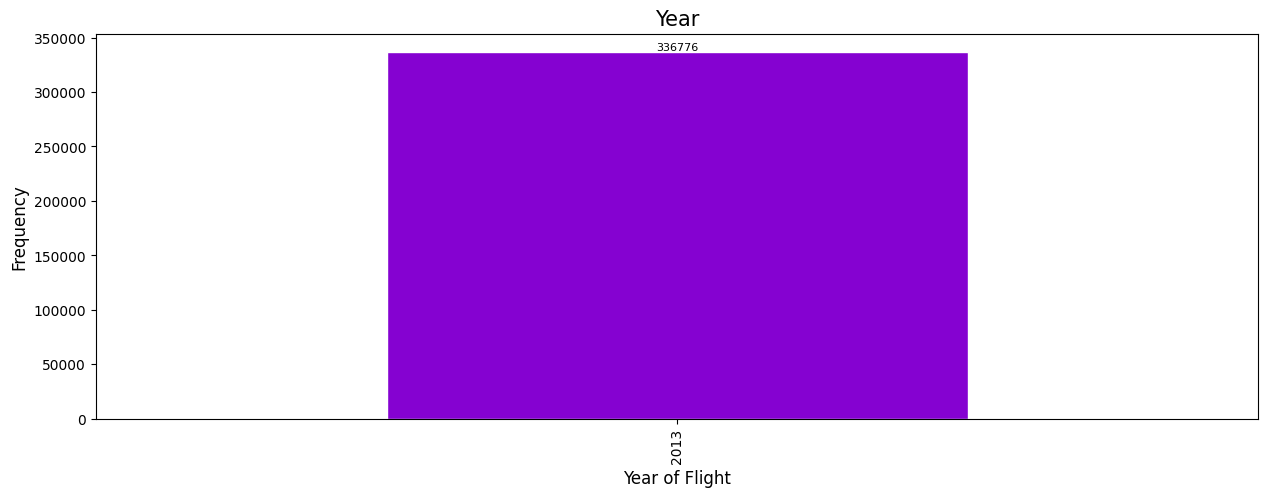

In [8]:
# The year in which the flight took place. The dataset includes flights from the year 2013.
plot_bar(df['year'], 'Year', 'Year of Flight')

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The dataset contains flight data for only one year (__2013__), so the bar plot only has one bar.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> month</span></b>

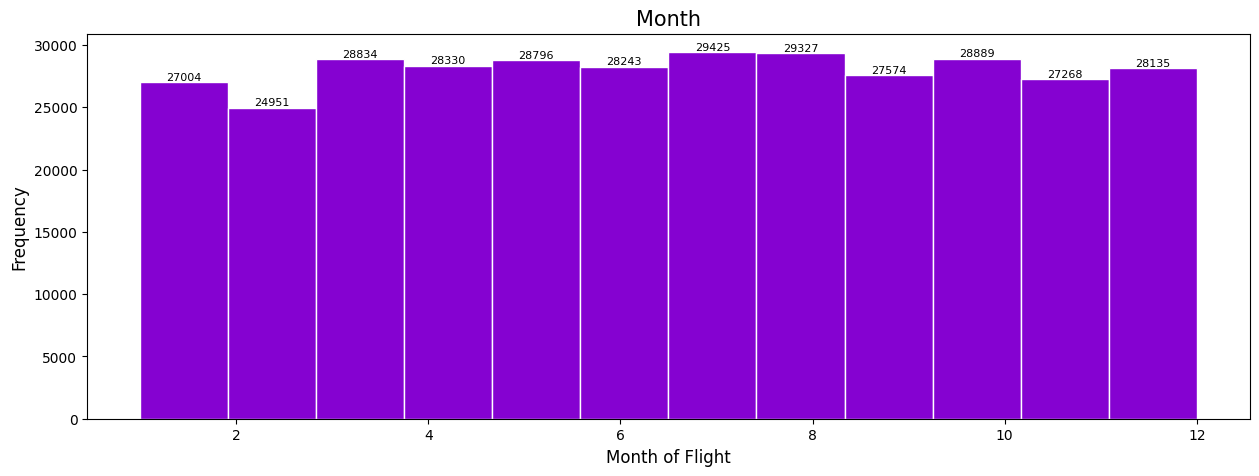

In [9]:
# The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December).
plot_hist(df['month'], bins=12, title='Month', xlabel='Month of Flight')

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

The histogram shows that the distribution of flights across different months is approximately uniform, with __a slight decrease in February__, which is likely due to the fewer number of days in that month.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> day</span></b>

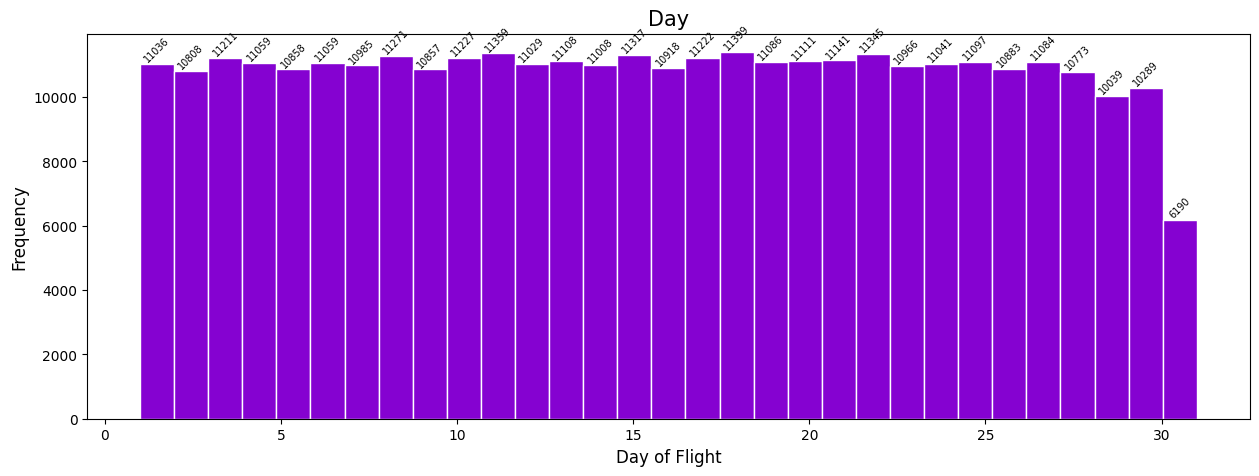

In [10]:
# The day of the month on which the flight took place, represented by an integer from 1 to 31.
plot_hist(df['day'], bins=31, title='Day', xlabel='Day of Flight', fontsize=7, rotation=45)

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The histogram reveals a mostly uniform distribution of flights across the days of the month, with slight decreases at the end of the month. These decreases are due to some months having fewer than 31 days.

### <b><span style='color:darkorange'><span style='color:#8502d1'> dep_time</span></b>

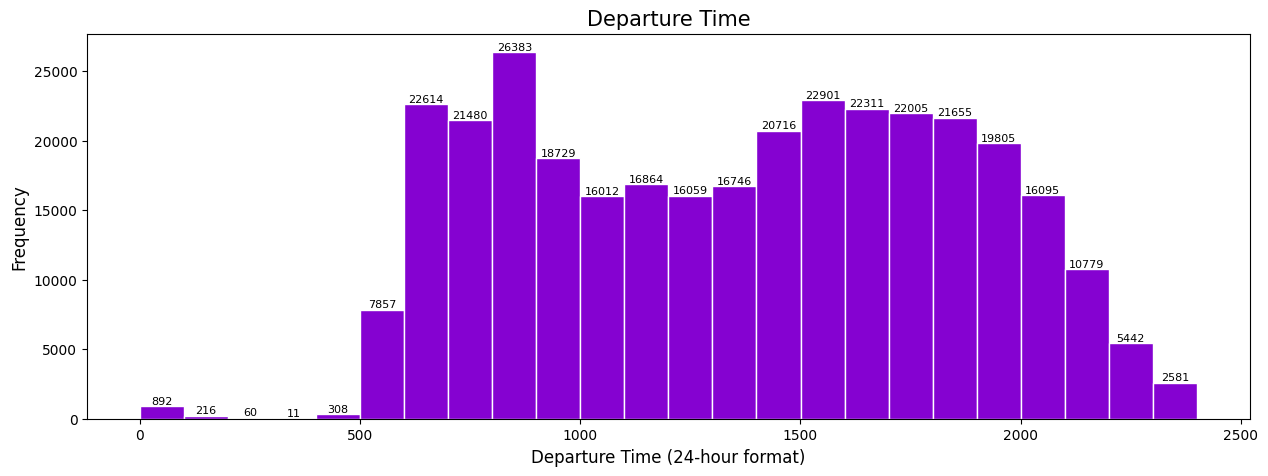

In [11]:
plot_hist(df['dep_time'].dropna(), bins=24, title='Departure Time', xlabel='Departure Time (24-hour format)')

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

The histogram shows __a bimodal distribution__, indicating two peak periods for flight departures. The first peak occurs in the morning around __06:00 hours__, and the second peak occurs in the evening around __18:00 hours__. There are fewer flights at night from 23:00 to 04:00 hours.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> sched_dep_time</span></b>

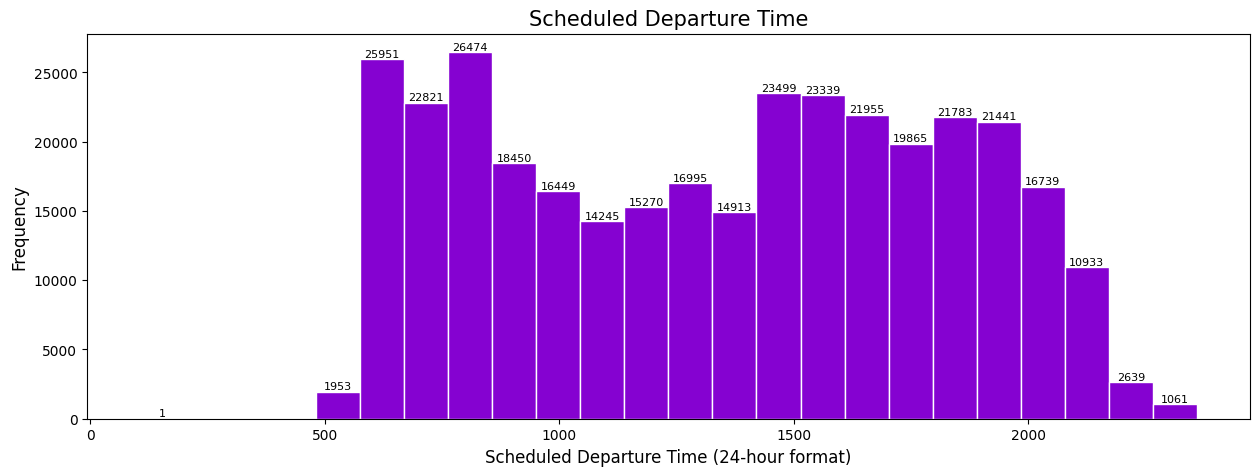

In [12]:
# The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm).
plot_hist(df['sched_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Scheduled Departure Time (24-hour format)')

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

This histogram is similar to the departure time histogram. It also shows two peak periods for scheduled flight departures, which are the same as the actual departure times.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> dep_delay</span></b>

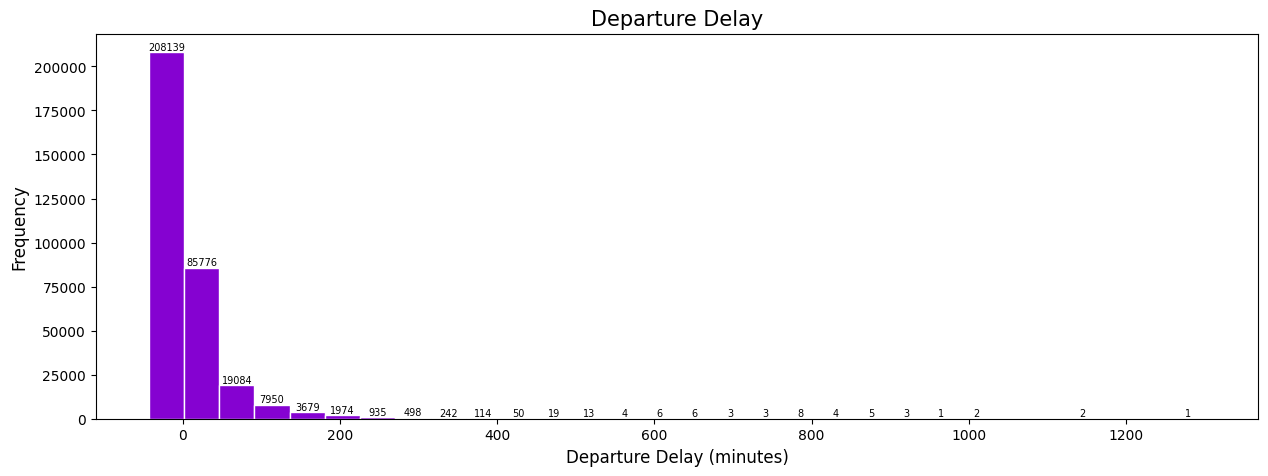

In [13]:
# The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. 
# Positive values indicate a delay, while negative values indicate an early departure.
plot_hist(df['dep_delay'].dropna(), bins=30, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The histogram indicates that most flights depart close to their scheduled departure time, as the peak of the distribution is around zero. However, there are also many flights with departure delays, shown by the long tail to the right of the distribution.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> arr_time</span></b>

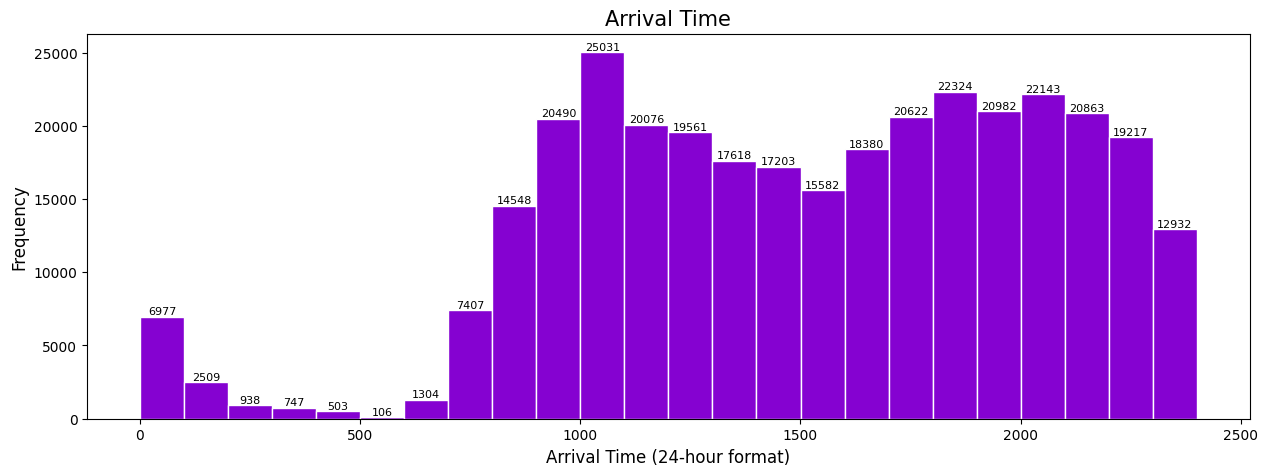

In [14]:
# The actual arrival time of the flight, represented in 24-hour format (hhmm).
plot_hist(df['arr_time'].dropna(), bins=24, title='Arrival Time', xlabel='Arrival Time (24-hour format)')

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The histogram shows a bimodal distribution, indicating two peak periods for flight arrivals. These are similar to the peak periods for flight departures.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> sched_arr_time</span></b>

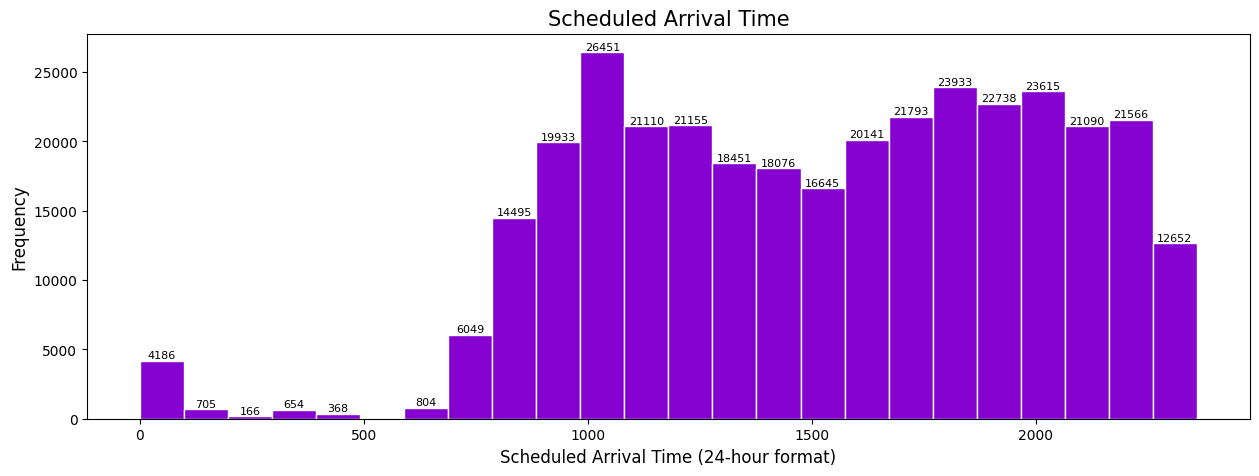

In [15]:
# The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm).
plot_hist(df['sched_arr_time'], bins=24, title='Scheduled Arrival Time', xlabel='Scheduled Arrival Time (24-hour format)')

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
This histogram is similar to the arrival time histogram, indicating that the scheduling is consistent with the actual times.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> arr_delay</span></b>

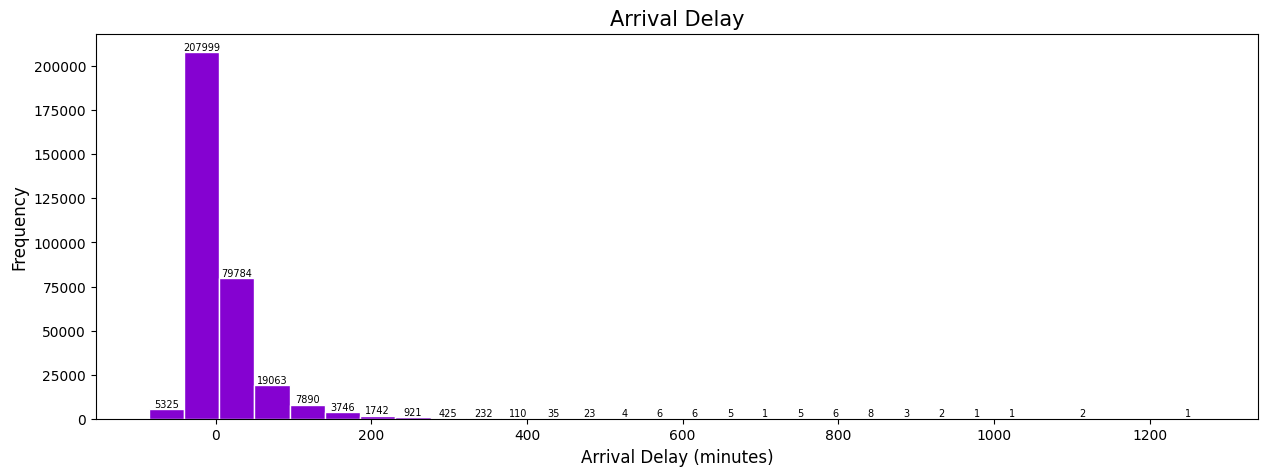

In [16]:
# The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. 
# Positive values indicate a delay, while negative values indicate an early arrival.
plot_hist(df['arr_delay'].dropna(), bins=30, title='Arrival Delay', xlabel='Arrival Delay (minutes)', fontsize=7)

<div style="border-radius:10px; padding: 15px; background-color:rgb(234, 231, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The histogram shows that most flights arrive close to their scheduled arrival time, as the peak of the distribution is around zero. However, there are also many flights with arrival delays, shown by the long tail to the right of the distribution.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> carrier</span></b>

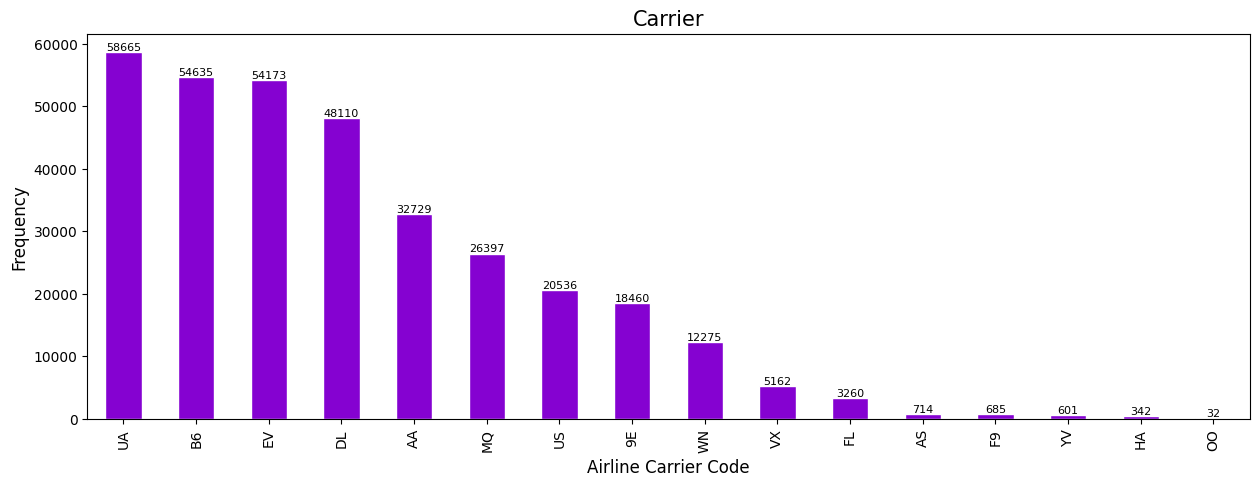

In [17]:
# A two-letter code representing the airline carrier responsible for the flight.
plot_bar(df['carrier'], 'Carrier', 'Airline Carrier Code')

<div style="border-radius:10px; padding: 15px; background-color:rgb(232, 231, 229); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The bar plot shows that the carriers with the codes __UA__, __B6__, __EV__, and __DL__ operate the most flights in this dataset.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> origin</span></b>

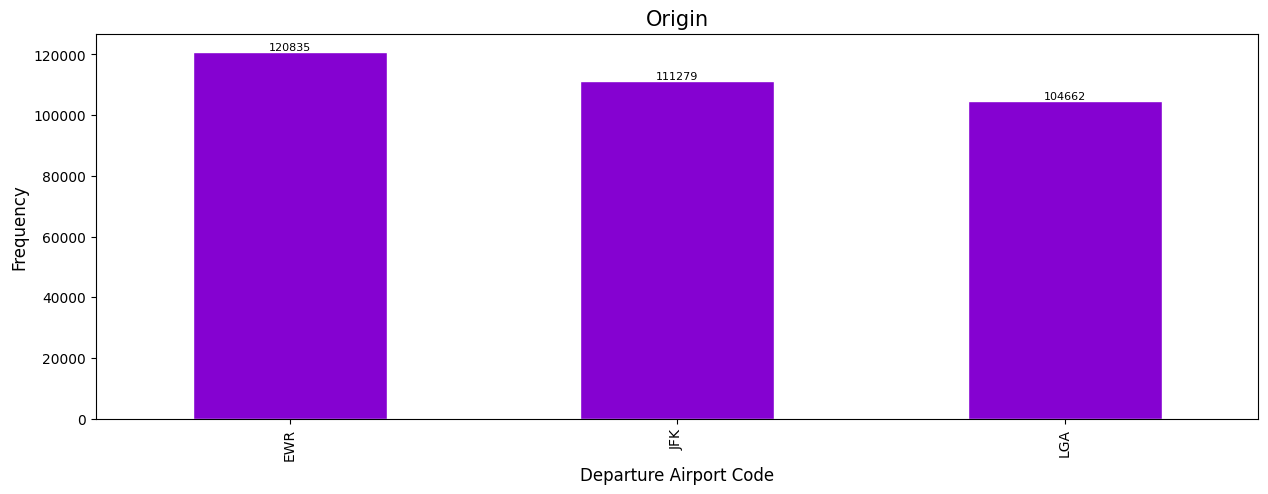

In [18]:
# A three-letter code signifying the airport from which the flight departed.
plot_bar(df['origin'], 'Origin', 'Departure Airport Code')

<div style="border-radius:10px; padding: 15px; background-color:rgb(225, 224, 222); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The bar plot reveals that the majority of flights in this dataset depart from the airport with the code __EWR__.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> destination</span></b>

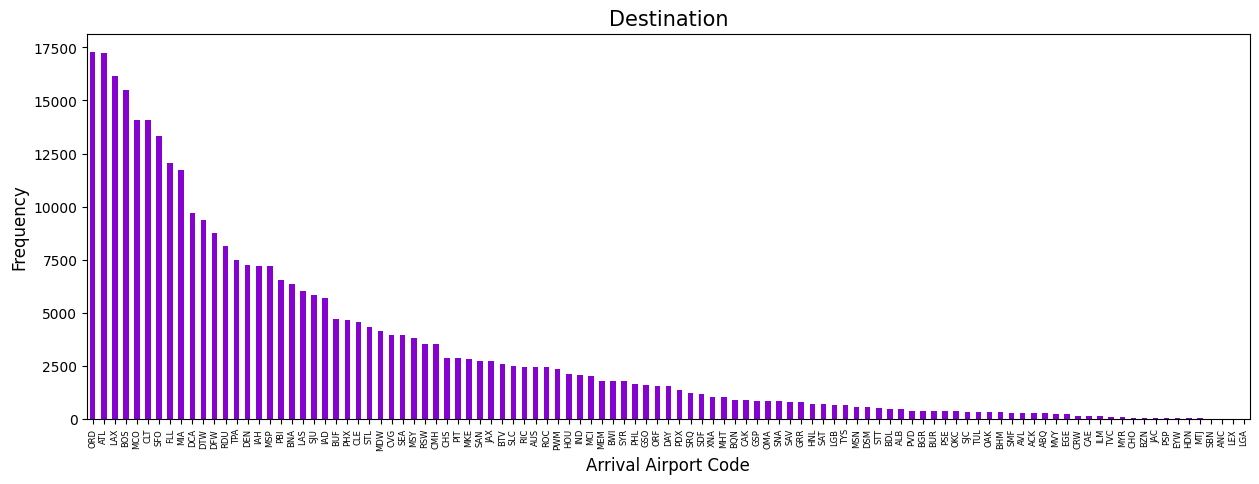

In [19]:
# A three-letter code representing the airport at which the flight arrived.
plt.figure(figsize=(15,5))
df['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=15)
plt.xlabel('Arrival Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(238, 238, 238); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The bar plot shows that the most common destination airports are __ORD__, __ATL__, and __LAX__.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> air_time</span></b>

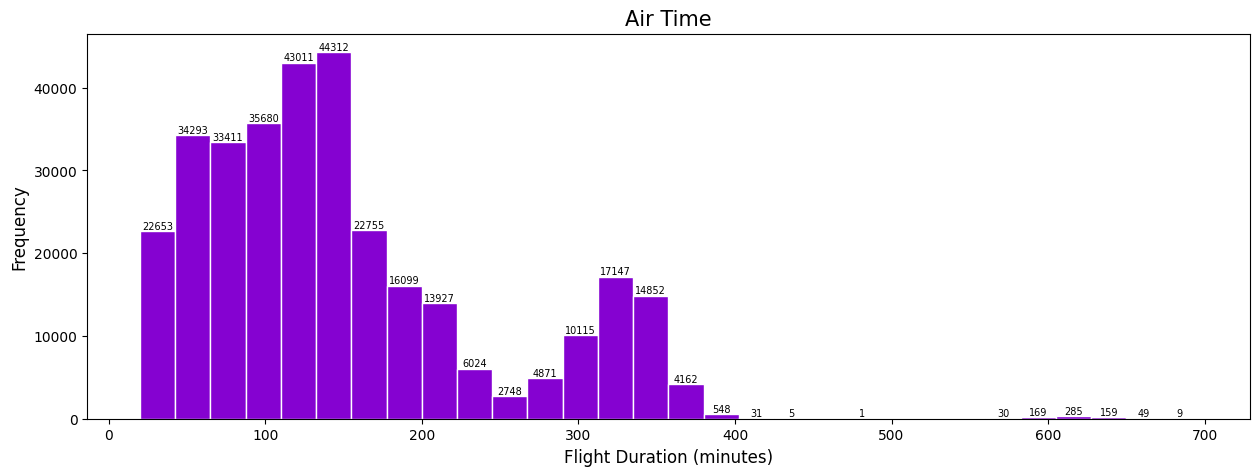

In [20]:
# The duration of the flight, measured in minutes.
plot_hist(df['air_time'].dropna(), bins=30, title='Air Time', xlabel='Flight Duration (minutes)', fontsize=7)

<div style="border-radius:10px; padding: 15px; background-color:rgb(231, 230, 228); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The histogram shows that most flights have an air time of around 50 to 200 minutes, with a few flights having significantly longer air times.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> distance</span></b>

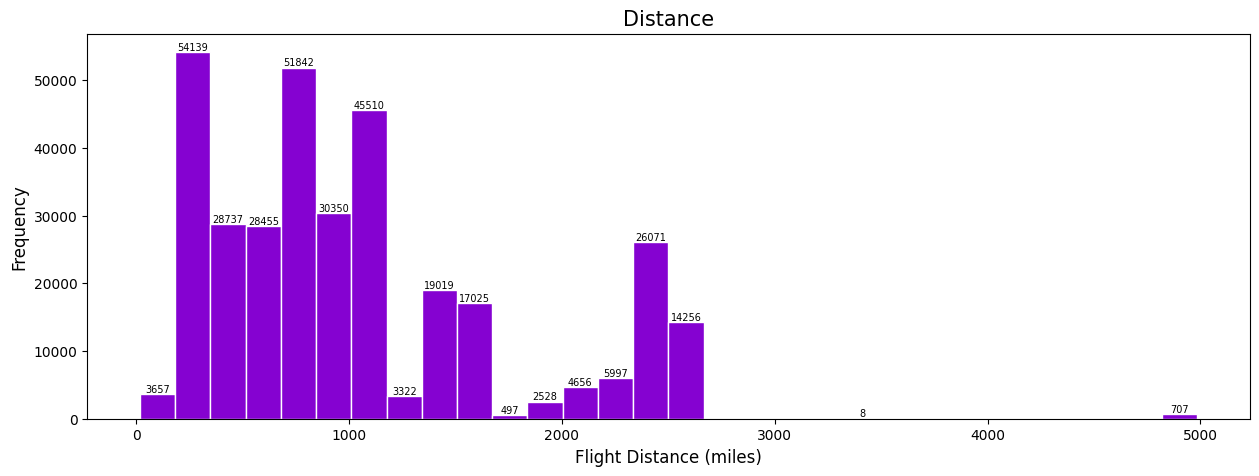

In [21]:
# The total distance (in miles) between the origin and destination airports.
plot_hist(df['distance'], bins=30, title='Distance', xlabel='Flight Distance (miles)', fontsize=7)

<div style="border-radius:10px; padding: 15px; background-color:rgb(235, 234, 232); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The histogram shows that most flights travel a distance of around 500 to 1000 miles, with a few flights traveling significantly longer distances.    

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> hour</span></b>

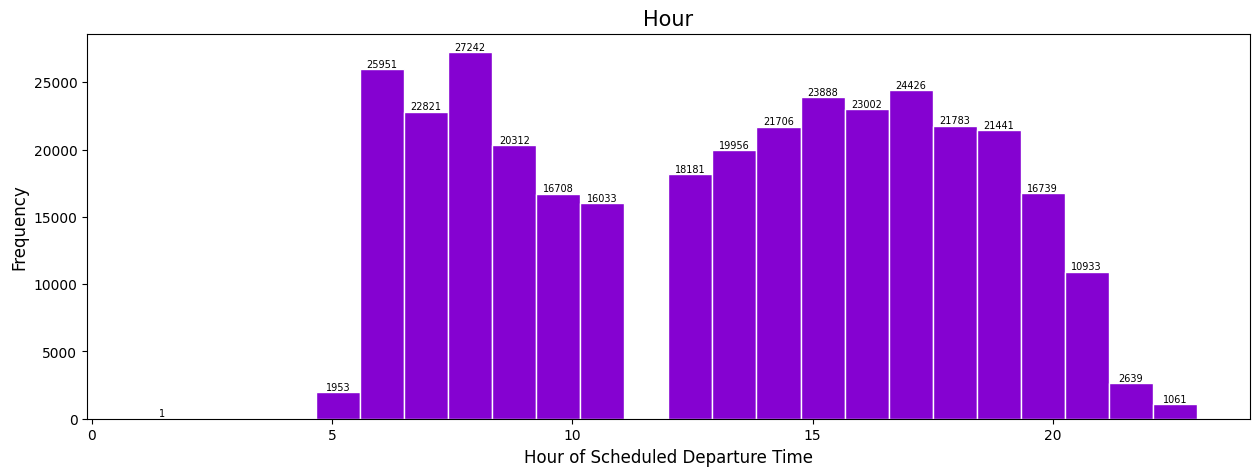

In [22]:
# The hour component of the scheduled departure time, expressed in local time.
plot_hist(df['hour'], bins=24, title='Hour', xlabel='Hour of Scheduled Departure Time', fontsize=7)

<div style="border-radius:10px; padding: 15px; background-color:rgb(237, 236, 234); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
he histogram reveals two peak periods for the hour component of the scheduled departure time, which correspond to the morning and evening peaks observed in the departure time histograms.    

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> minute</span></b>

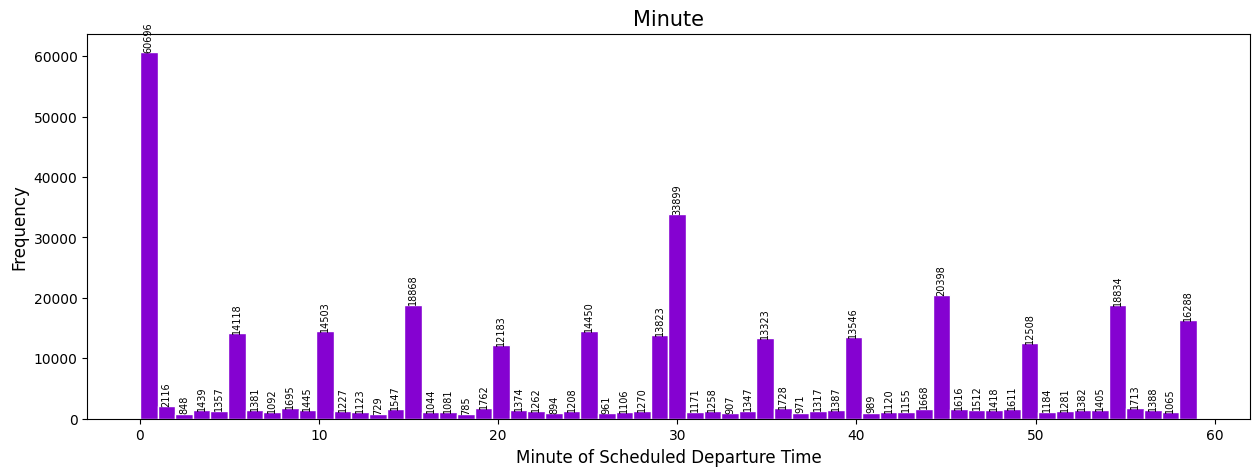

In [23]:
# The minute component of the scheduled departure time, expressed in local time.
plot_hist(df['minute'], bins=60, title='Minute', xlabel='Minute of Scheduled Departure Time', fontsize=7, rotation=90)

<div style="border-radius:10px; padding: 15px; background-color:rgb(231, 230, 228); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The histogram shows almost a uniform distribution for the minute component of the scheduled departure time, indicating that flights are evenly scheduled across all minutes of an hour.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> name</span></b>

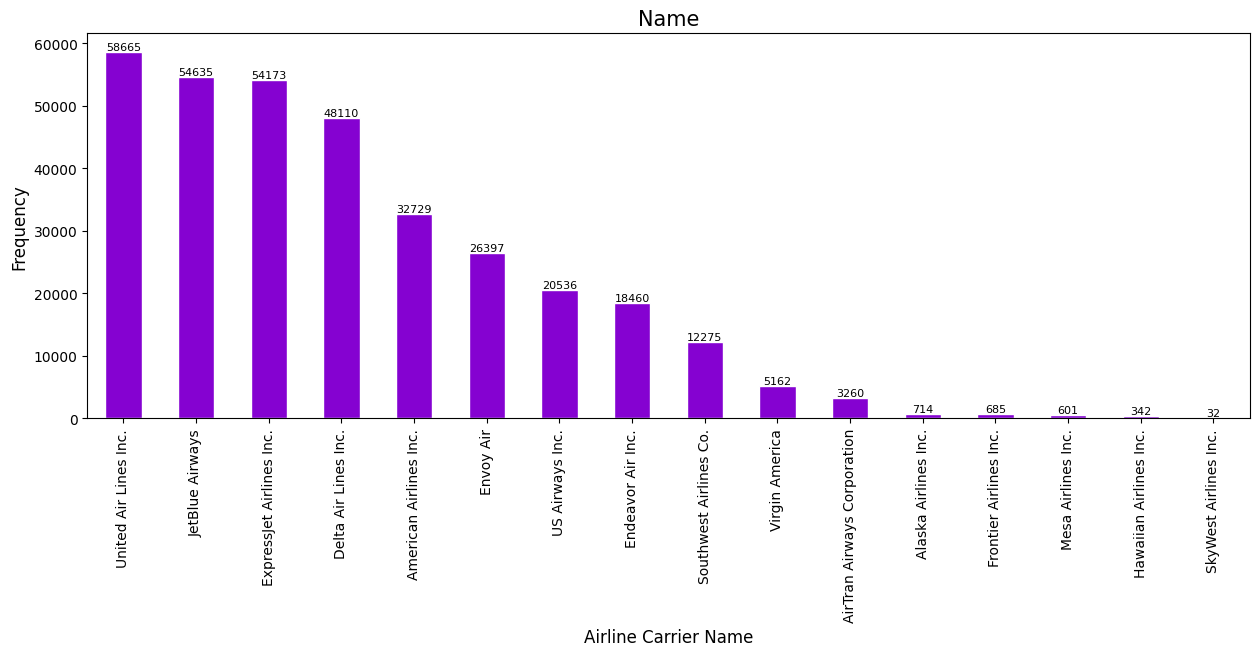

In [24]:
# The full name of the airline carrier responsible for the flight.
plot_bar(df['name'], 'Name', 'Airline Carrier Name')

<div style="border-radius:10px; padding: 15px; background-color:rgb(228, 227, 225); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The bar plot shows that __United Air Lines Inc.__, __JetBlue Airways__, and __ExpressJet Airlines Inc.__ are the airlines that operate the most flights in this dataset.

<div style="border-radius:10px; padding: 15px; background-color:rgb(232, 230, 226); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Note:</font></h2>
    

* Since `id`, `flight`, `tailnum` are just __unique identifiers__ (__containing many unique values__) for each flight and does not provide any meaningful information, we skipped plotting them.
    
* The `time_hour` (scheduled departure time of the flight), represented in local time and formatted as __yyyy-mm-dd hh:mm:ss__. This column contains datetime information which is already represented by the `year`, `month`, `day`, `hour`, and `minute` columns, so we skipped plotting it as well.


## <div style = "text-align:left ; font-size:80%"><span style = "color:#8502d1"><b>2)Byvariate Analysis</b></span></div>

<div style="border-radius:10px; padding: 15px; background-color:rgb(235, 233, 230); font-size:110%; text-align:left">
    
For our bivariate analysis, we'll consider the `arr_delay` column as the __target__. We can analyze the relationship between `arr_delay` and other columns. To do this, we can use __scatter plots__ for __numerical columns__ and __violin plots__ for __categorical columns__. We skip `id`, `flight`, `tailnum`, `time_hour` as they are identifiers or contain redundant information.

In [25]:
# Define color palette with different shades of color #8502d1 for boxplots
colors_box = sns.dark_palette("#8502d1", as_cmap=False)

# Define colormap with different shades of color #8502d1 for scatter plots
colors_scatter = sns.dark_palette("#8502d1", as_cmap=True)

# Define the function to plot scatter plots
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.scatter(x, y, c=y, cmap=colors_scatter, s=2)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(label=ylabel)
    plt.show()

# Define the function to plot violin plots
def plot_violin(x, y, title, xlabel, ylabel, fontsize=8):
    plt.figure(figsize=(15,5))
    sns.violinplot(x=x, y=y, palette=colors_box)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.show()

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Year vs Arrival Delay</span></b>

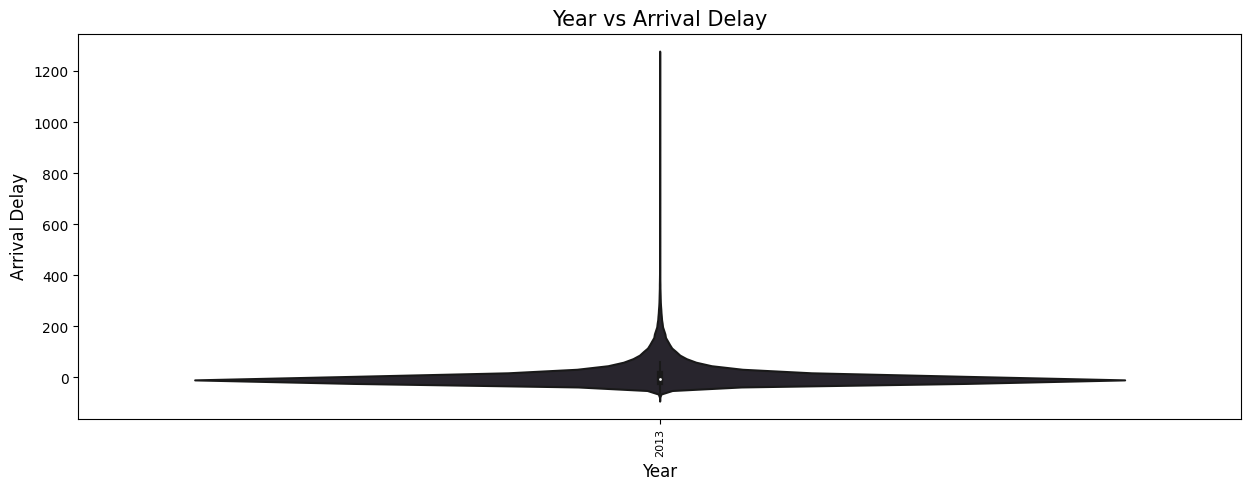

In [26]:
# year vs arr_delay
plot_violin(df['year'], df['arr_delay'], 'Year vs Arrival Delay', 'Year', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(218, 216, 214); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The violin plot does not provide much information as the dataset contains flights from only one year.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Month vs Arrival Delay</span></b>

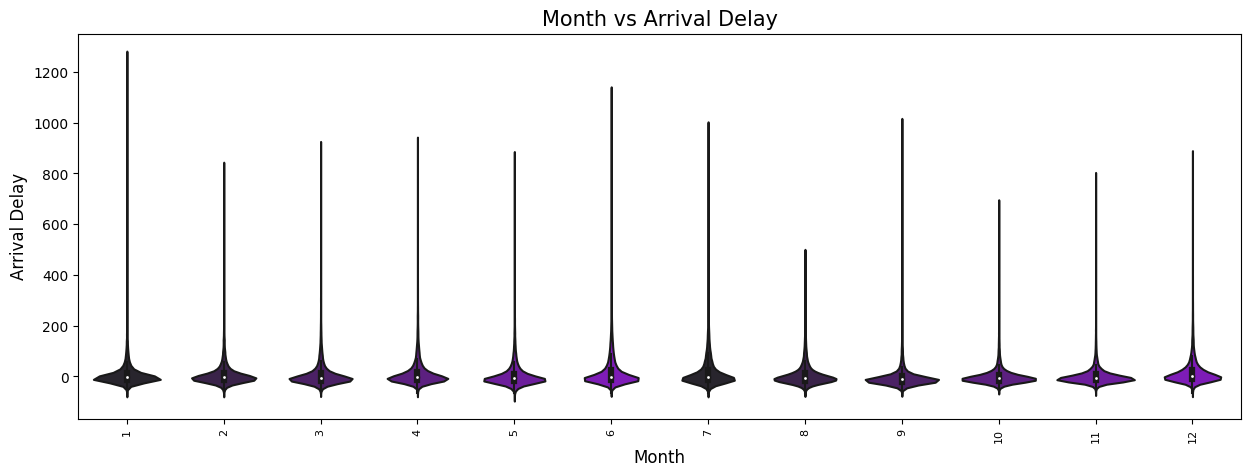

In [27]:
# month vs arr_delay
plot_violin(df['month'], df['arr_delay'], 'Month vs Arrival Delay', 'Month', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(211, 210, 208); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The violin plot shows that the distribution of arrival delays varies by month. Some months (like __June__, __July__, and __December__) have wider distributions, indicating a higher variability in arrival delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Day vs Arrival Delay</span></b>

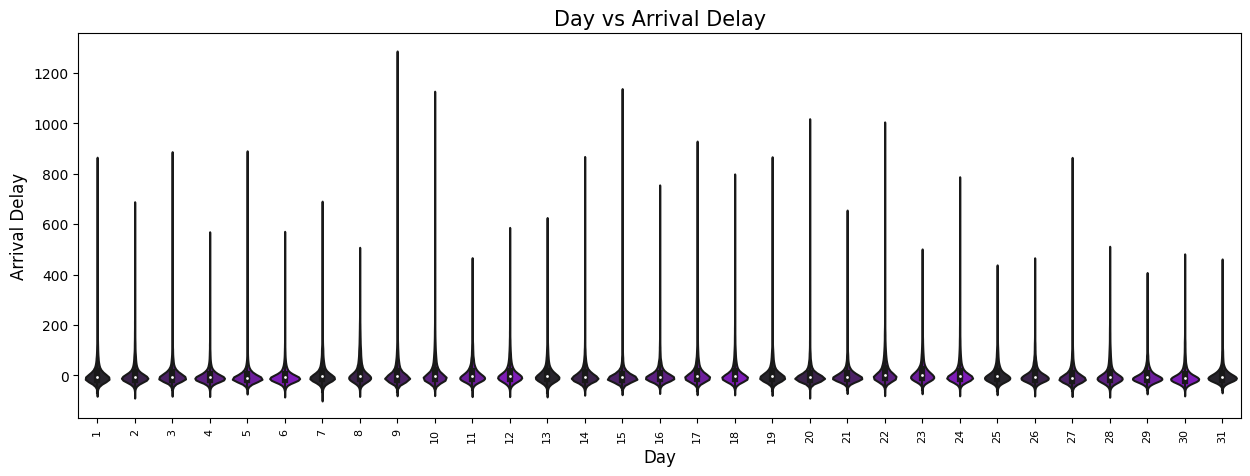

In [28]:
# day vs arr_delay
plot_violin(df['day'], df['arr_delay'], 'Day vs Arrival Delay', 'Day', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(217, 217, 217); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The violin plot indicates that the day of the month does not have a significant impact on the distribution of arrival delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Departure Time vs Arrival Delay</span></b>

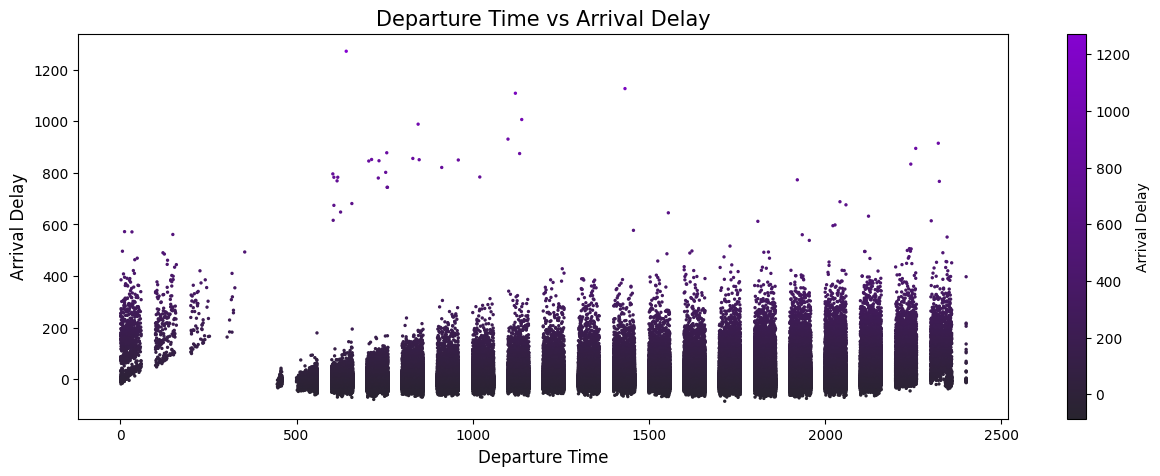

In [29]:
# dep_time vs arr_delay
plot_scatter(df['dep_time'], df['arr_delay'], 'Departure Time vs Arrival Delay', 'Departure Time', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(226, 225, 223); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The scatter plot shows a slight trend indicating that flights departing later in the day tend to have more delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Scheduled Departure Time vs Arrival Delay</span></b>

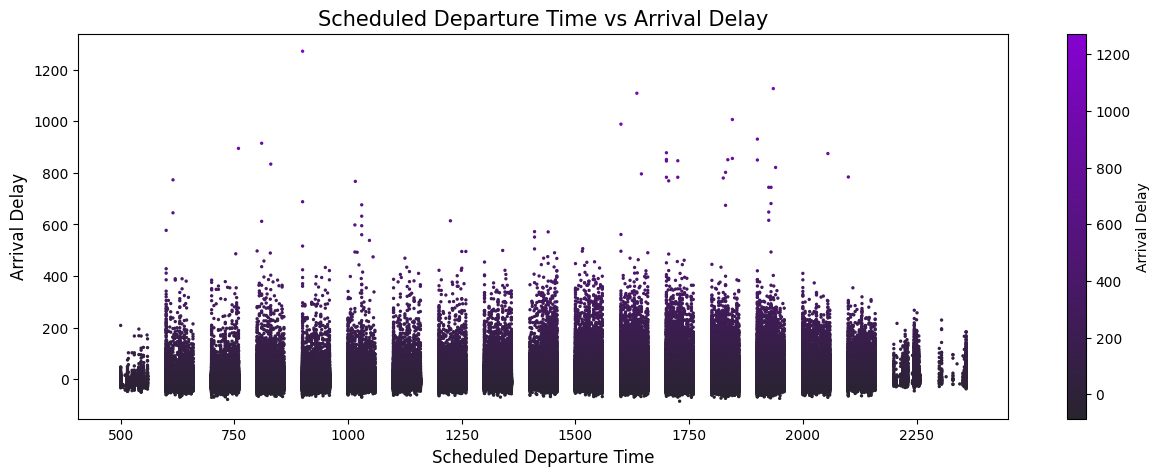

In [30]:
# sched_dep_time vs arr_delay
plot_scatter(df['sched_dep_time'], df['arr_delay'], 'Scheduled Departure Time vs Arrival Delay', 'Scheduled Departure Time', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(214, 214, 214); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
This plot shows a similar pattern to the previous one, indicating that flights scheduled to depart later in the day tend to have more delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Departure Delay vs Arrival Delay</span></b>

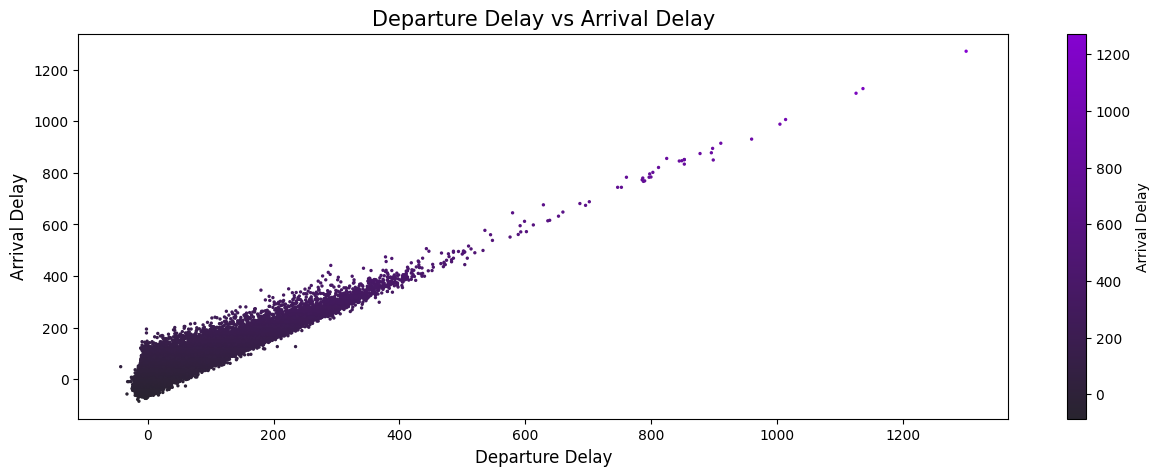

In [31]:
# dep_delay vs arr_delay
plot_scatter(df['dep_delay'], df['arr_delay'], 'Departure Delay vs Arrival Delay', 'Departure Delay', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(225, 224, 221); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

As expected, there is a strong positive correlation between departure delay and arrival delay.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Arrival Time vs Arrival Delay</span></b>

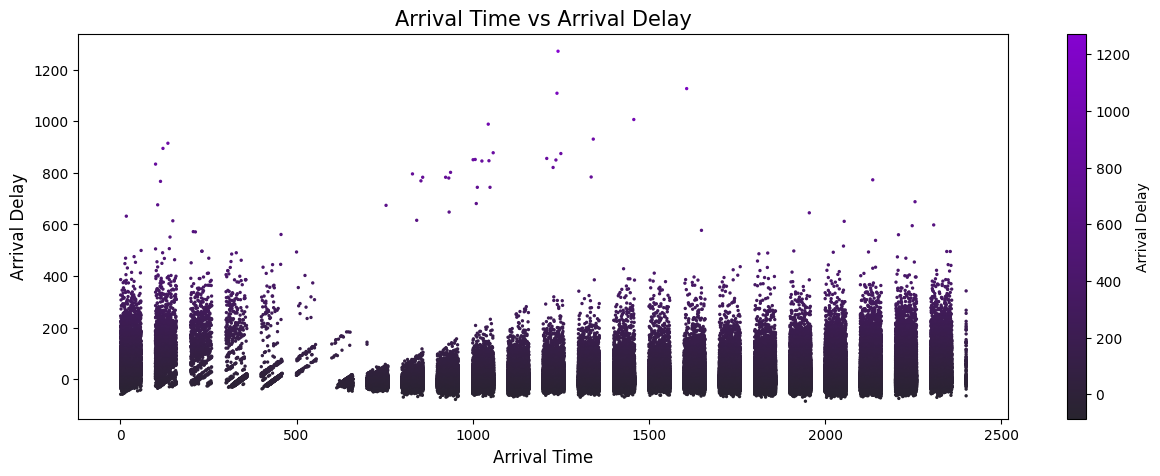

In [32]:
# arr_time vs arr_delay
plot_scatter(df['arr_time'], df['arr_delay'], 'Arrival Time vs Arrival Delay', 'Arrival Time', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(216, 216, 215); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

The scatter plot shows that flights arriving later in the day tend to have more delays, which is consistent with the departure time observations.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Scheduled Arrival Time vs Arrival Delay</span></b>

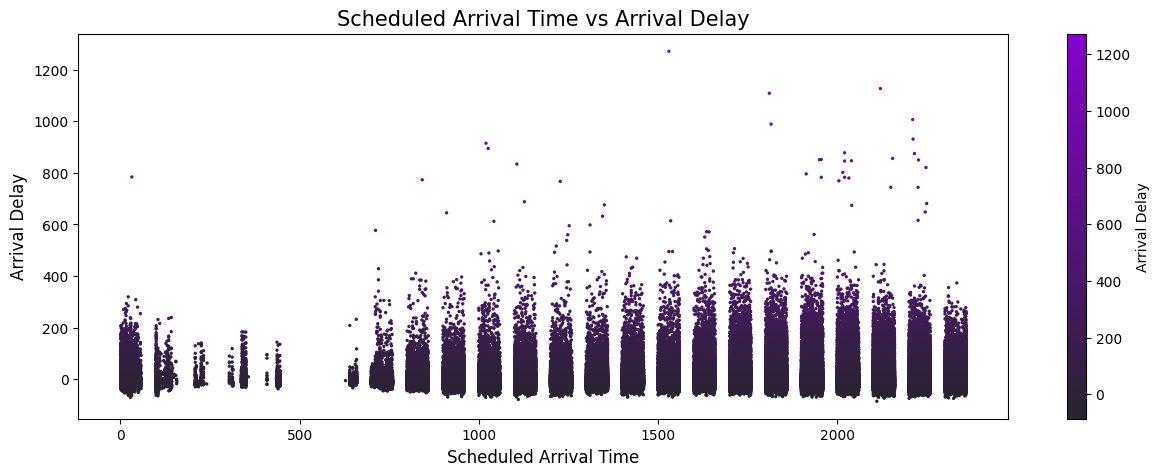

In [33]:
# sched_arr_time vs arr_delay
plot_scatter(df['sched_arr_time'], df['arr_delay'], 'Scheduled Arrival Time vs Arrival Delay', 'Scheduled Arrival Time', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(227, 227, 227); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

This plot also shows that flights scheduled to arrive later in the day tend to have more delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Carrier vs Arrival Delay</span></b>

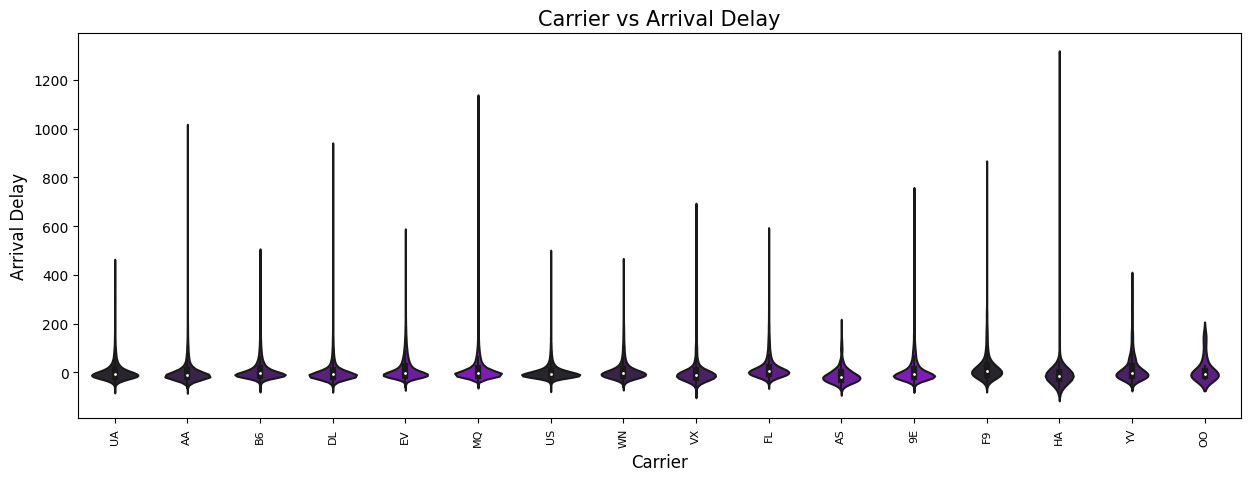

In [34]:
# carrier vs arr_delay
plot_violin(df['carrier'], df['arr_delay'], 'Carrier vs Arrival Delay', 'Carrier', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(211, 210, 208); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

The violin plot shows that different carriers have different distributions of arrival delays. Some carriers tend to have more severe delays, while others have milder delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Origin vs Arrival Delay</span></b>

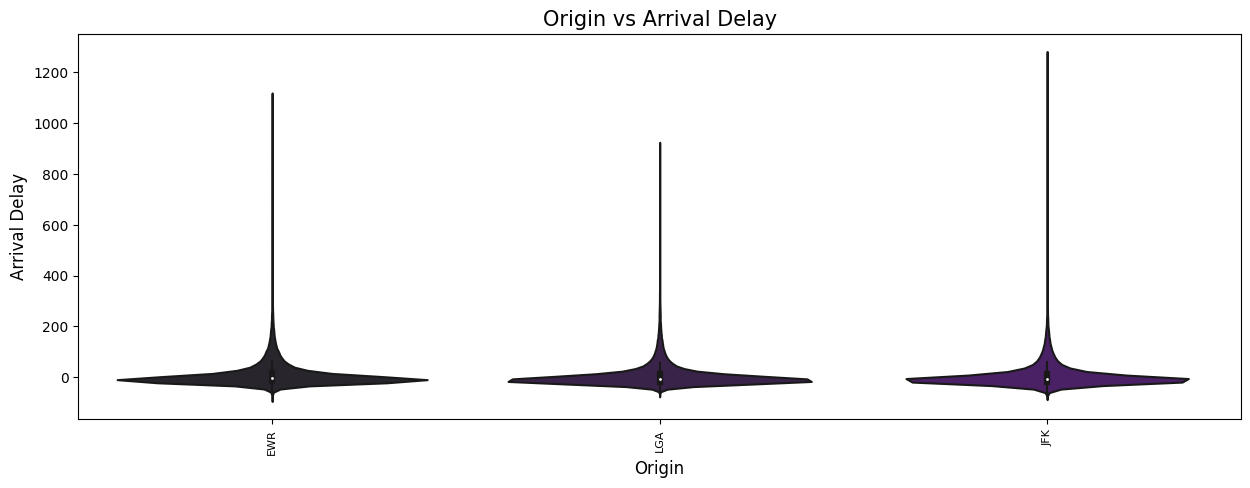

In [35]:
# origin vs arr_delay
plot_violin(df['origin'], df['arr_delay'], 'Origin vs Arrival Delay', 'Origin', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(226, 225, 225); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

The violin plot shows that flights from different origins have different distributions of arrival delays. Some airports tend to have flights with more severe delays, while others have flights with milder delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Destination vs Arrival Delay</span></b>

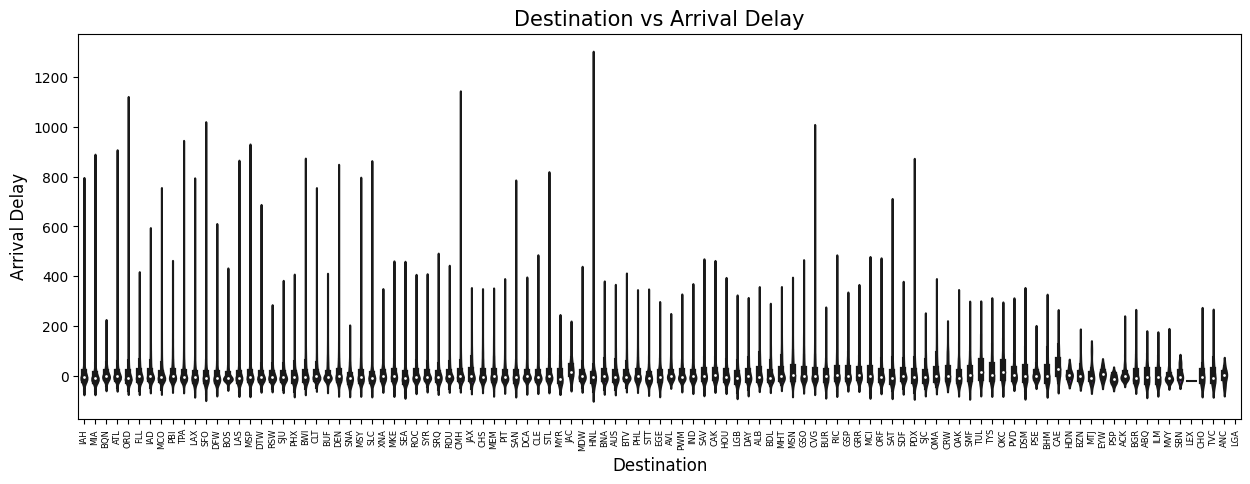

In [36]:
# dest vs arr_delay
plot_violin(df['dest'], df['arr_delay'], 'Destination vs Arrival Delay', 'Destination', 'Arrival Delay', fontsize=6)

<div style="border-radius:10px; padding: 15px; background-color:rgb(224, 222, 219); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

The violin plot shows that flights going to different destinations have different distributions of arrival delays. Some destination airports tend to receive flights with more severe delays, while others receive flights with milder delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Air Time vs Arrival Delay</span></b>

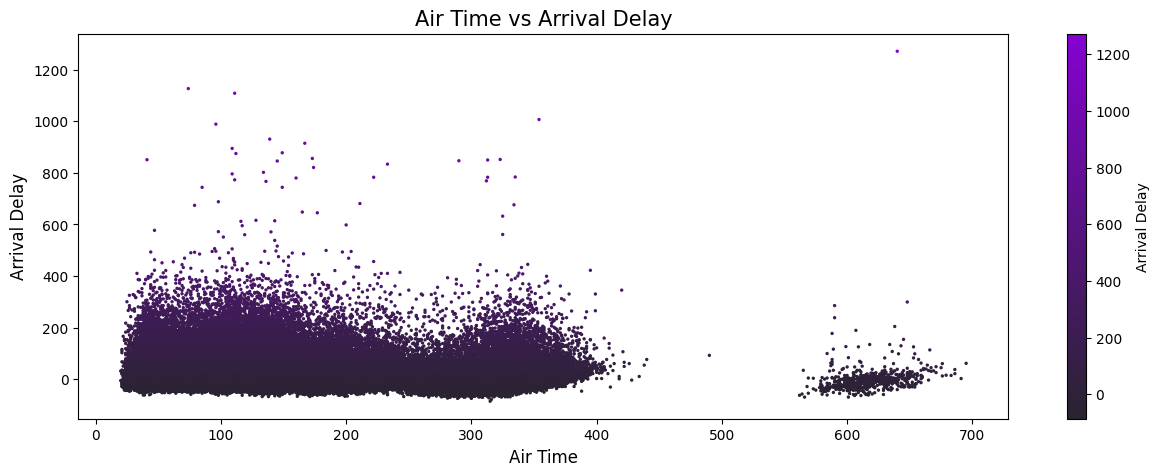

In [37]:
# air_time vs arr_delay
plot_scatter(df['air_time'], df['arr_delay'], 'Air Time vs Arrival Delay', 'Air Time', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(224, 224, 224); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

The scatter plot does not show a clear trend, suggesting that the duration of the flight (`air_time`) does not have a significant impact on the arrival delay.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Distance vs Arrival Delay</span></b>

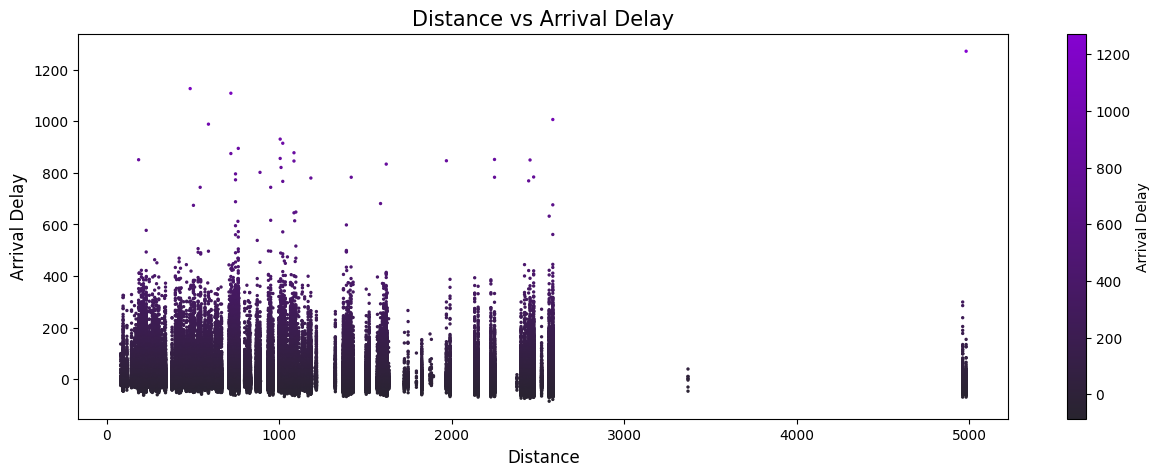

In [38]:
# distance vs arr_delay
plot_scatter(df['distance'], df['arr_delay'], 'Distance vs Arrival Delay', 'Distance', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(230, 229, 228); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

This plot also does not show a clear trend, indicating that the distance of the flight does not have a significant impact on the arrival delay.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Hour vs Arrival Delay</span></b>

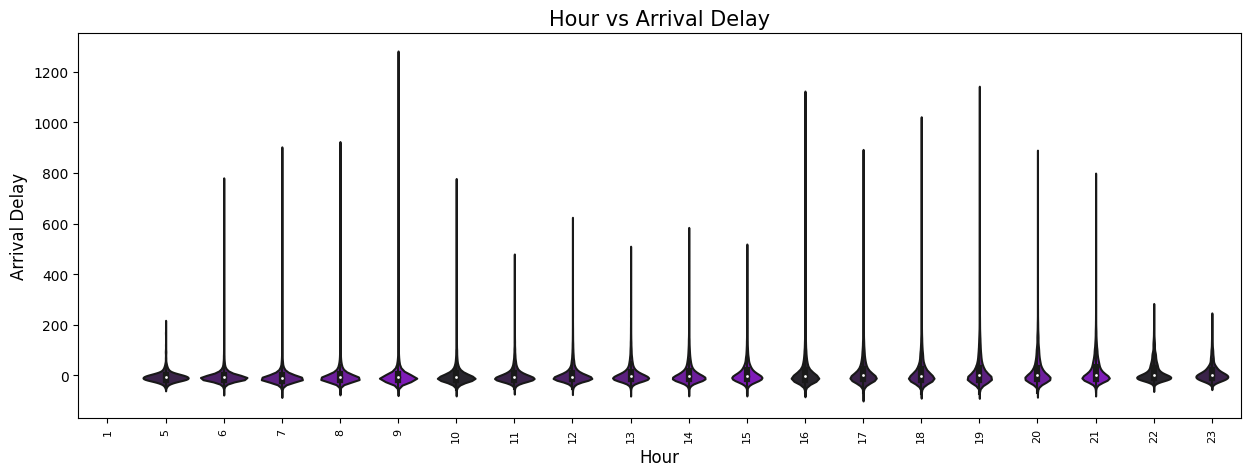

In [39]:
# hour vs arr_delay
plot_violin(df['hour'], df['arr_delay'], 'Hour vs Arrival Delay', 'Hour', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(227, 225, 221); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The violin plot shows that flights departing at different hours of the day have different distributions of arrival delays. Flights departing later in the day tend to have a higher variability in arrival delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Minute vs Arrival Delay</span></b>

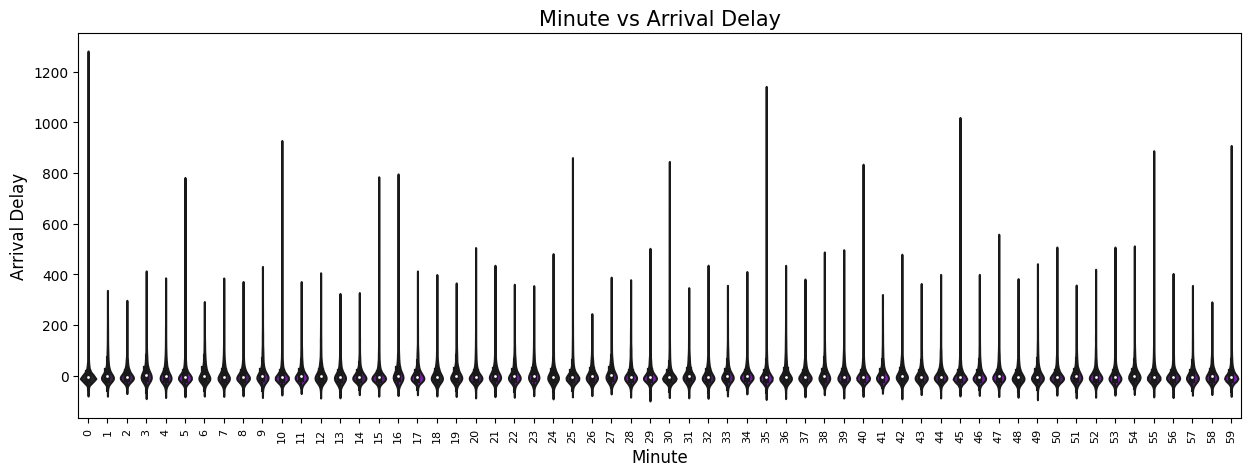

In [40]:
# minute vs arr_delay
plot_violin(df['minute'], df['arr_delay'], 'Minute vs Arrival Delay', 'Minute', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(229, 229, 229); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The violin plot suggests that the minute of the hour of the departure time does not have a significant impact on the distribution of arrival delays.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Name vs Arrival Delay</span></b>

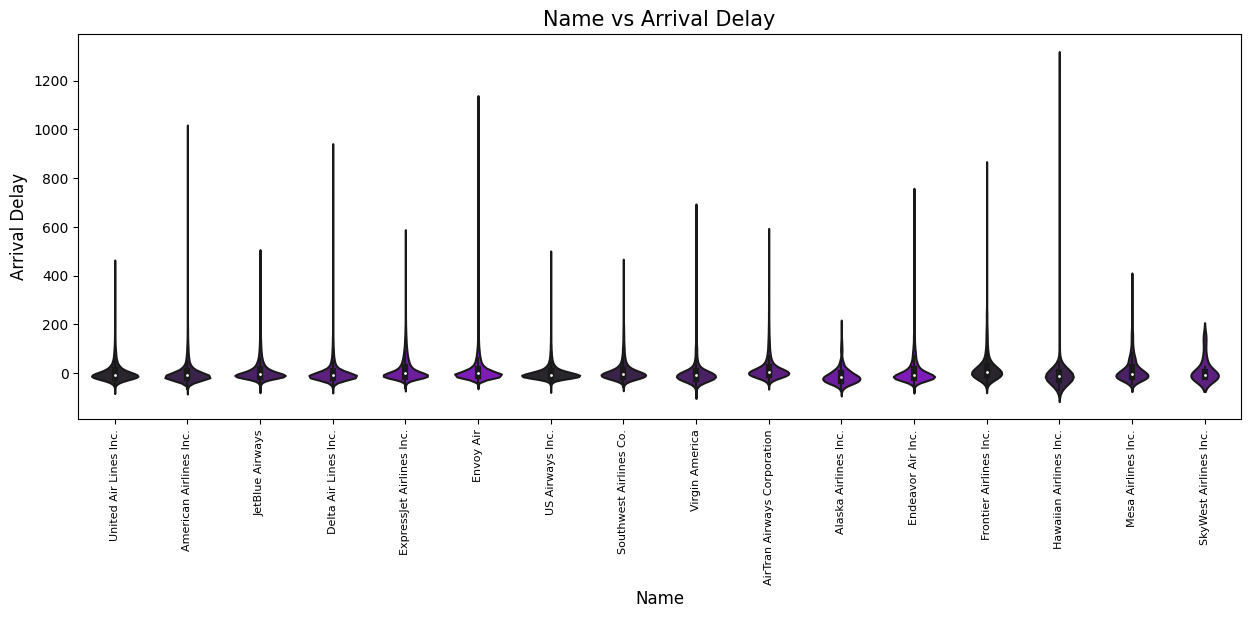

In [41]:
# name vs arr_delay
plot_violin(df['name'], df['arr_delay'], 'Name vs Arrival Delay', 'Name', 'Arrival Delay')

<div style="border-radius:10px; padding: 15px; background-color:rgb(222, 222, 222); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
This violin plot shows that different airlines (represented by their names) have different distributions of arrival delays. Some airlines tend to have more severe delays, while others have milder delays.

<div style="border-radius:10px; padding: 15px; background-color:rgb(226, 225, 224); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Conclusion:</font></h2>

Based on the bivariate analysis, the features that have a __noticeable impact on arrival delay__ are:

- Month
- Departure Time and Scheduled Departure Time
- Departure Delay
- Arrival Time and Scheduled Arrival Time
- Carrier
- Origin
- Destination
- Hour

On the other hand, the following features __do not__ seem to significantly __influence arrival delay__:

- Day
- Air Time
- Distance
- Minute

____
<a id="multivariate"></a>

# <b><span style='color:darkorange'></span><span style='color:#8502d1'> Multivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color:rgb(214, 213, 212); font-size:110%; text-align:left">

A multivariate analysis will allow us to understand the interactions between different features of the dataset and how they collectively impact the target variable (‍‍‍`arr_delay`).

Due to the complexity of multivariate plots, we will only consider a few key features. The choice of these features is based on the results from the bivariate analysis: `month`, `dep_time`, `dep_delay`, `carrier`, `origin`, `dest`, and `hour`.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> Correlation between Numerical Features</span></b>

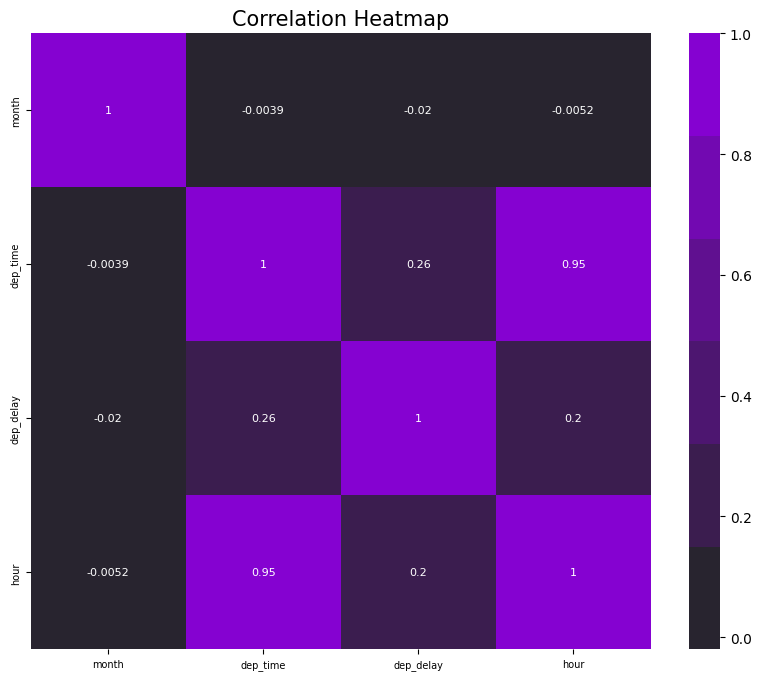

In [42]:
# Define color palette with different shades of color #8502d1 for multivariate plots
colors_multi = sns.dark_palette("#8502d1", as_cmap=False)

# For correlation heatmap, let's consider the numeric features only
numeric_features = ['month', 'dep_time', 'dep_delay', 'hour']
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap=colors_multi, annot_kws={"size": 8})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(232, 232, 232); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>
    
The heatmap shows the correlation coefficients between the numeric features. `dep_delay` has a strong positive correlation with `arr_delay`, which means that as the departure delay increases, the arrival delay also tends to increase. The other features (`month`, `dep_time`, and `hour`) show very weak correlations with `arr_delay`, suggesting that these features by themselves do not strongly influence the arrival delay.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> dep_delay vs dep_time across different carrier</span></b>

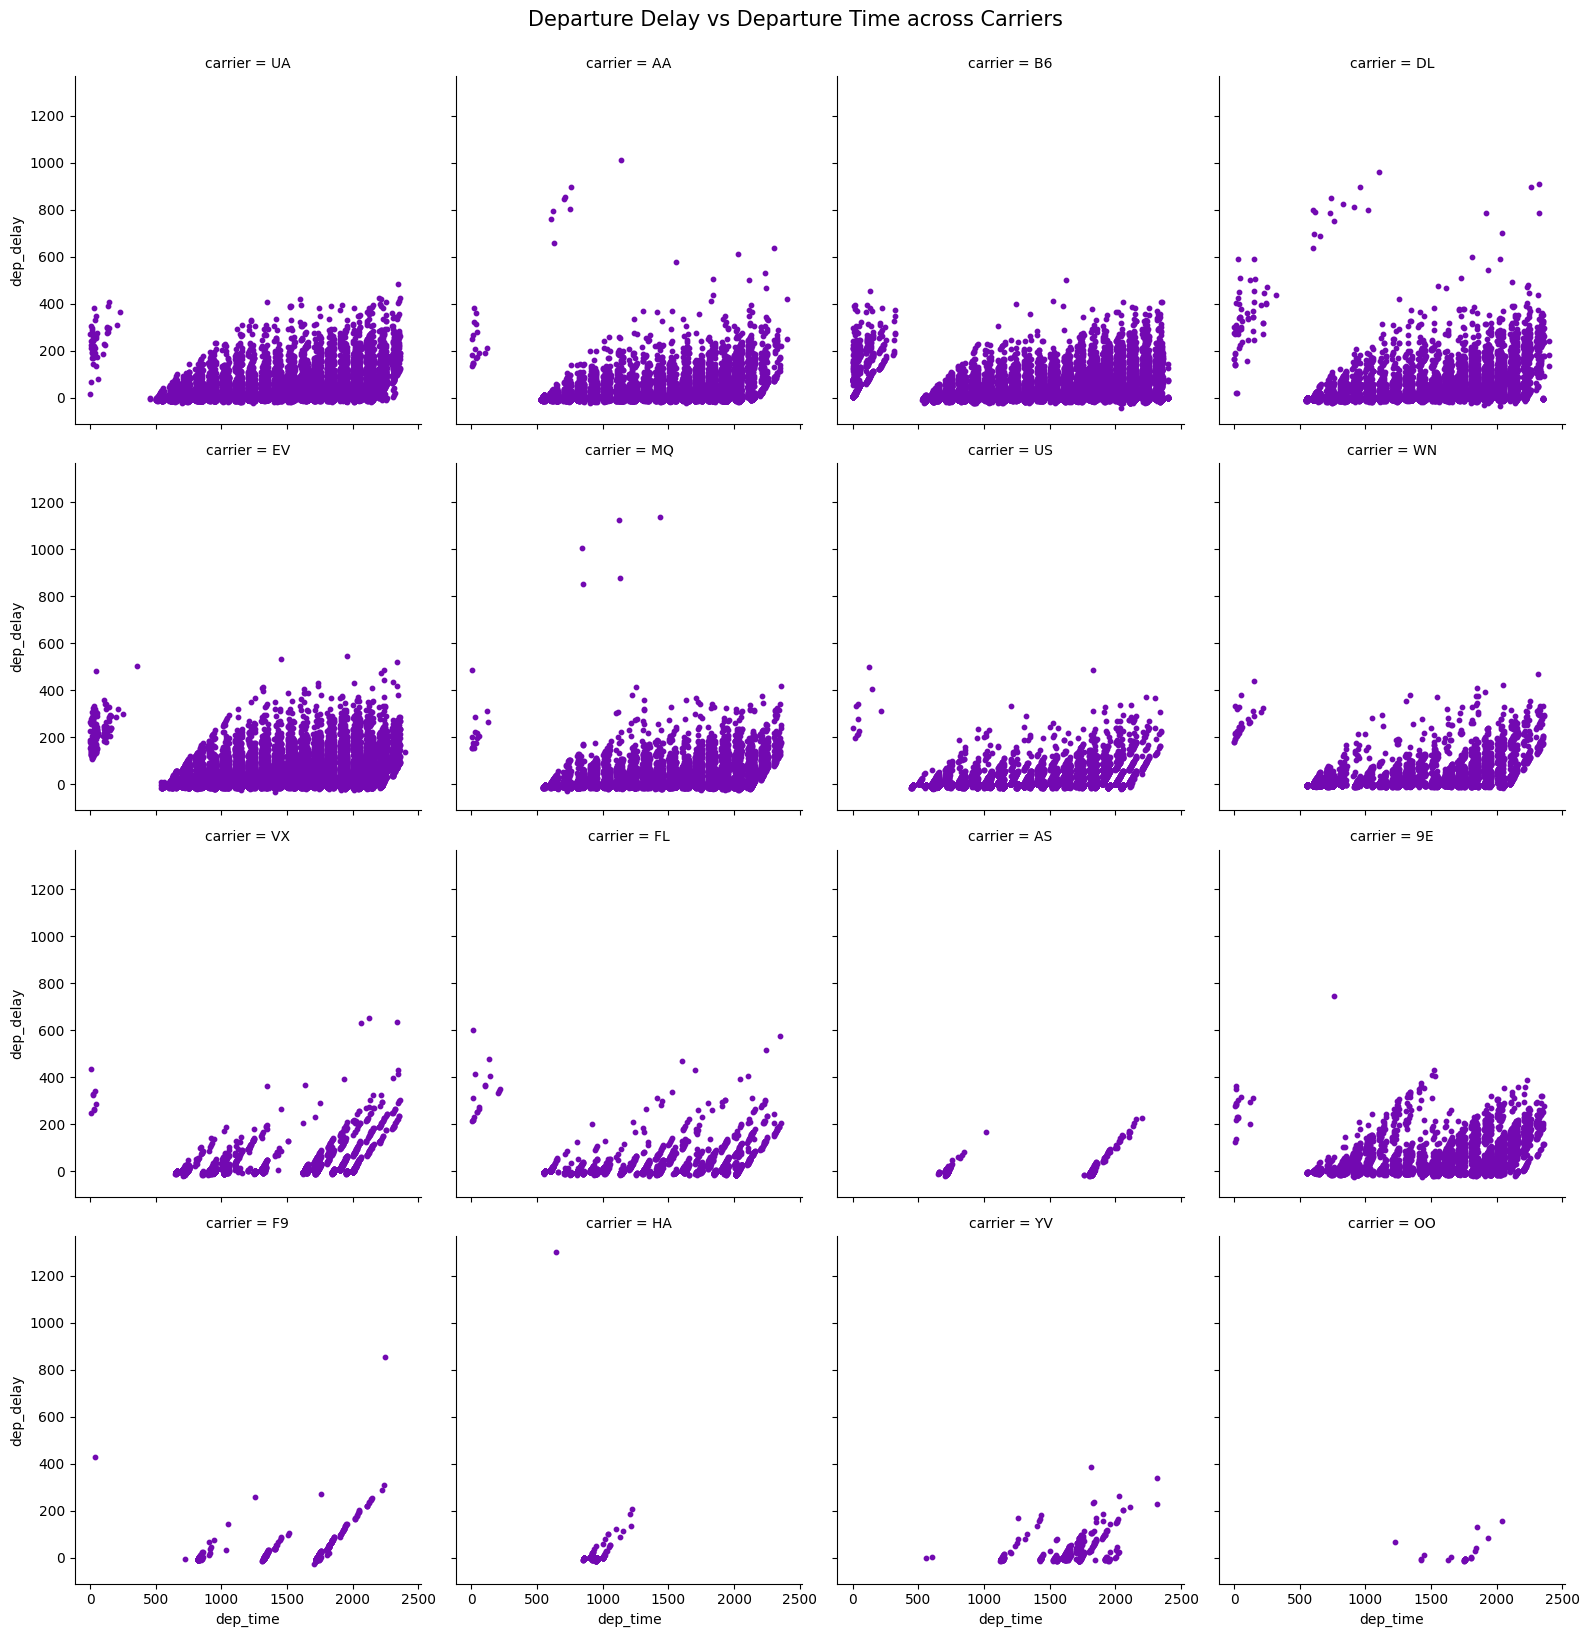

In [43]:
# 'dep_delay' vs 'dep_time' across different 'carrier'
g = sns.FacetGrid(df, col="carrier", col_wrap=4, height=4, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Carriers', fontsize=15, y=1.02)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(232, 231, 230); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

These scatter plots show the relationship between departure delay and departure time for different carriers. Some carriers show a more pronounced trend of increased departure delay with later departure times, while others do not. This suggests that the interaction between carrier and departure time could be a significant factor influencing arrival delay.

### <b><span style='color:darkorange'></span><span style='color:#8502d1'> dep_delay vs dep_time across different origin</span></b>

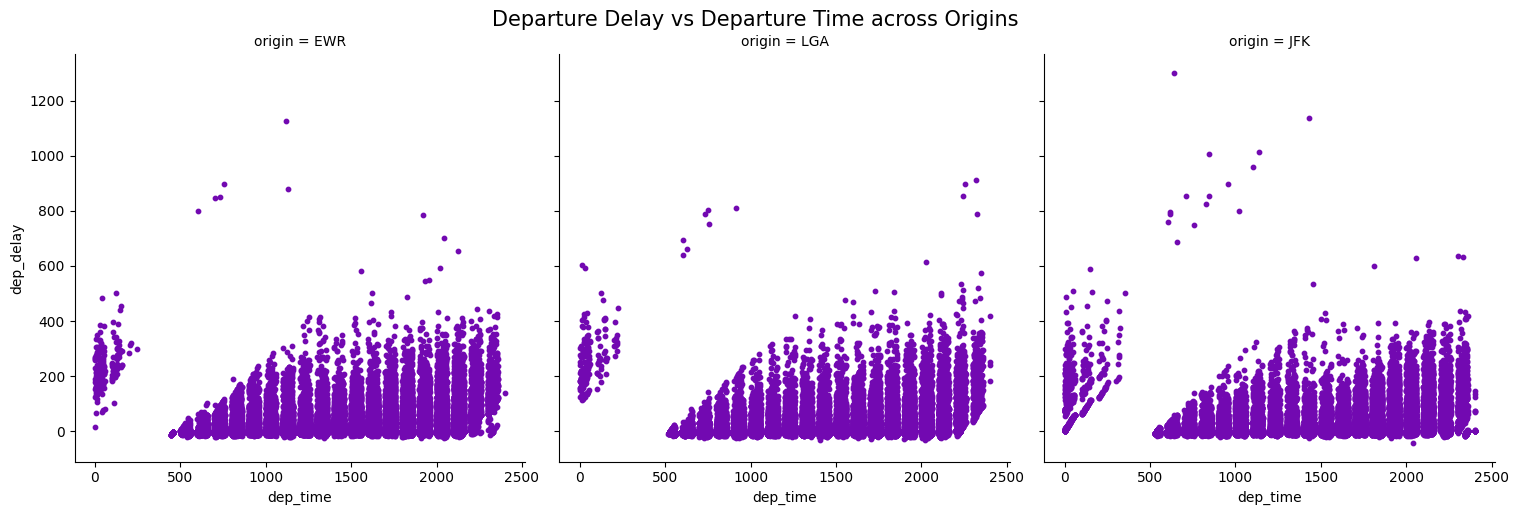

In [44]:
# 'dep_delay' vs 'dep_time' across different 'origin'
g = sns.FacetGrid(df, col="origin", col_wrap=4, height=5, aspect=1)
g.map(plt.scatter, "dep_time", "dep_delay", color=colors_multi[-2], s=10)
g.fig.suptitle('Departure Delay vs Departure Time across Origins', fontsize=15, y=1.02, x=0.38)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(224, 222, 220); font-size:110%; text-align:left">

<h2 align="left"><font color=#8502d1>Inference:</font></h2>

These scatter plots show the relationship between departure delay and departure time for flights from different origins. Similar to the carrier plots, some origin airports show a more pronounced trend of increased departure delay with later departure times, while others do not. This suggests that the interaction between origin airport and departure time could also be a significant factor influencing arrival delay.

<p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">END</p>